Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Cost: 8


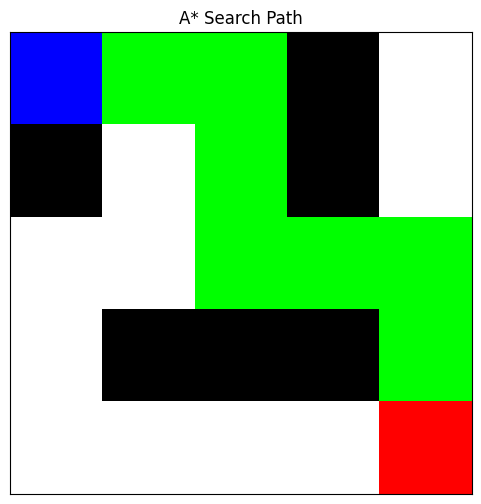

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# ---------- A* Search ----------
def heuristic(a, b, htype="manhattan"):
    (x1, y1), (x2, y2) = a, b
    dist = abs(x1 - x2) + abs(y1 - y2)
    if htype == "manhattan":
        return dist
    if htype == "scaled":
        return 1.5 * dist
    if htype == "inconsistent":
        return dist + (3 if (x1, y1) == (1, 1) else 0)
    return 0

def astar(maze, start, goal, htype="manhattan"):
    rows, cols = len(maze), len(maze[0])
    open_list = [(heuristic(start, goal, htype), 0, start, [start])]
    visited = set()

    while open_list:
        f, g, node, path = heapq.heappop(open_list)
        if node in visited: 
            continue
        visited.add(node)

        if node == goal:
            return path, g

        x, y = node
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = x+dx, y+dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                new_path = path + [(nx, ny)]
                new_g = g + 1
                h = heuristic((nx, ny), goal, htype)
                heapq.heappush(open_list, (new_g + h, new_g, (nx, ny), new_path))
    return None, float("inf")

# ---------- Visualization ----------
def visualize_maze(maze, path, start, goal):
    maze = np.array(maze)
    img = np.ones((*maze.shape, 3))  # white background

    # Walls in black
    img[maze == 1] = [0, 0, 0]

    # Path in green
    if path:
        for r, c in path:
            img[r, c] = [0, 1, 0]

    # Start (blue) and Goal (red)
    img[start] = [0, 0, 1]
    img[goal] = [1, 0, 0]

    plt.figure(figsize=(6, 6))
    plt.imshow(img, interpolation="nearest")
    plt.xticks([]), plt.yticks([])
    plt.title("A* Search Path")
    plt.show()

# ---------- Example ----------
maze = [
    [0,0,0,1,0],
    [1,0,0,1,0],
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,0,0,0,0]
]
start, goal = (0,0), (4,4)

path, cost = astar(maze, start, goal, htype="manhattan")
print("Path:", path)
print("Cost:", cost)

visualize_maze(maze, path, start, goal)
